In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Distances

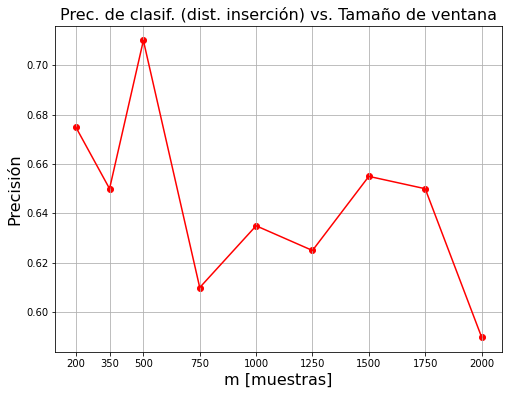

In [8]:
emes = [200, 350, 500, 750, 1000, 1250, 1500, 1750, 2000]
distancias = [10, 20, 50, 75, 95]
fallas = ['NoFault', 'AB', 'BC', 'CA', 'ABC', 'AG', 'BG', 'CG']

accuracies_dists = []
for m in emes:
    acc = pd.read_excel(f'matrices_conf_dists/m{m}/accuracy_m{m}.xlsx')
    val = float(acc['Accuracy'].values)
    accuracies_dists.append(val)

plt.figure(figsize=(8,6))
plt.plot(emes, accuracies_dists, color='r')
plt.scatter(emes, accuracies_dists, color='r')
plt.grid()
plt.xlabel('m [muestras]', fontsize=16)
plt.xticks(emes)
plt.ylabel('Precisión', fontsize=16)
plt.title('Prec. de clasif. (dist. inserción) vs. Tamaño de ventana', fontsize=16)
plt.savefig(f'grafs_y_cms/espa/dacc_vs_m_original.eps', format='eps')

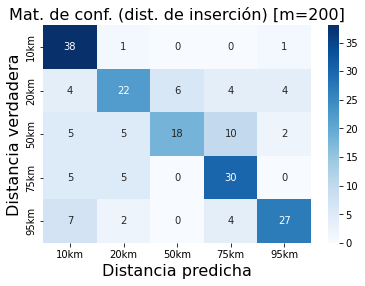

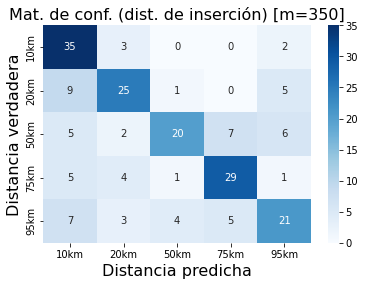

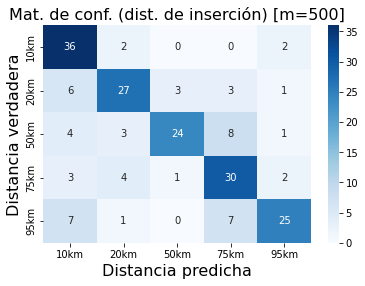

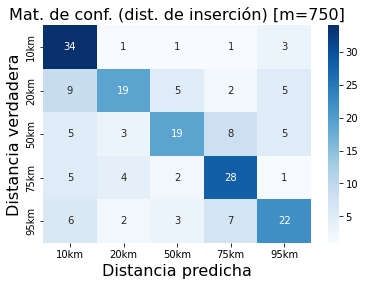

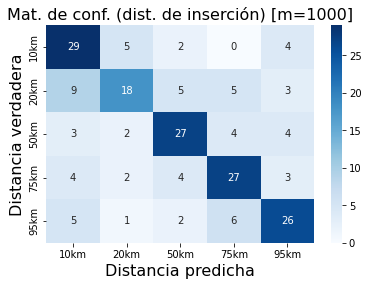

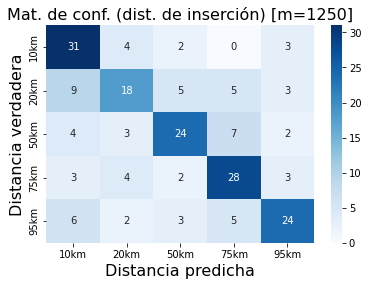

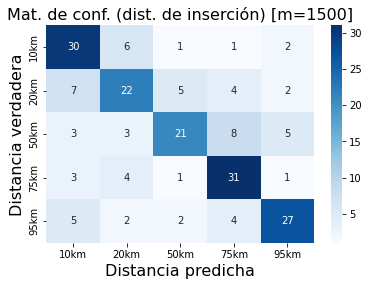

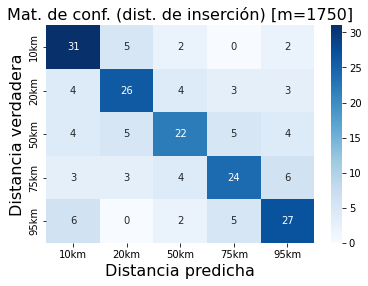

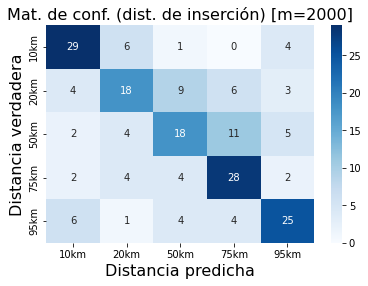

In [9]:
def get_cm_from_excel(path):
    df1 = pd.read_excel(path)
    df2 = df1.drop(['Unnamed: 0'], axis=1)
    cm = np.array([df2.iloc[0].values, df2.iloc[1].values, df2.iloc[2].values, df2.iloc[3].values, df2.iloc[4].values])
    return cm

for m in emes:
    path = f'matrices_conf_dists/m{m}/mat_conf_dists_m{m}.xlsx'
    cm = get_cm_from_excel(path)

    plt.figure()
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap="Blues")
    # labels, title and ticks
    ax.set_xlabel('Distancia predicha', fontsize=16)
    ax.set_ylabel('Distancia verdadera', fontsize=16)
    ax.set_title(f'Mat. de conf. (dist. de inserción) [m={m}]', fontsize=16)
    ax.xaxis.set_ticklabels(['10km', '20km', '50km', '75km', '95km'])
    ax.yaxis.set_ticklabels(['10km', '20km', '50km', '75km', '95km'])

    plt.savefig(f'grafs_y_cms/espa/orig_cm_distances_{m}.eps', format='eps')


# Faults

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 432x288 with 0 Axes>

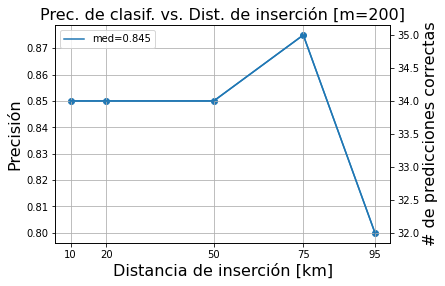

<Figure size 432x288 with 0 Axes>

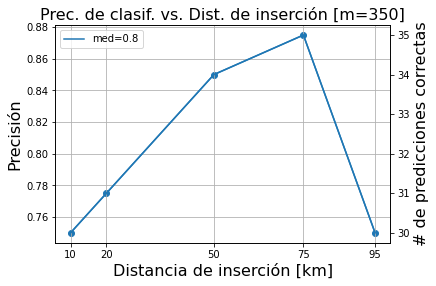

<Figure size 432x288 with 0 Axes>

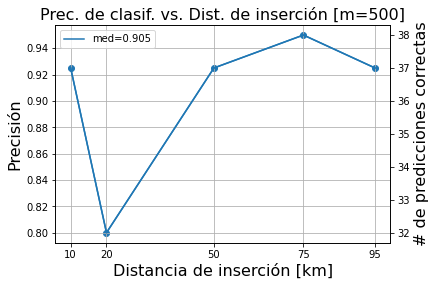

<Figure size 432x288 with 0 Axes>

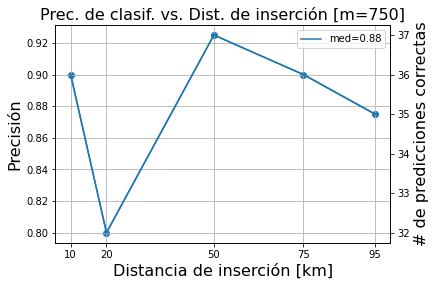

<Figure size 432x288 with 0 Axes>

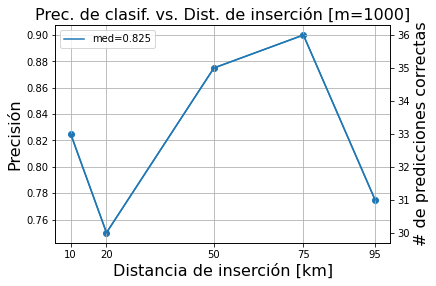

<Figure size 432x288 with 0 Axes>

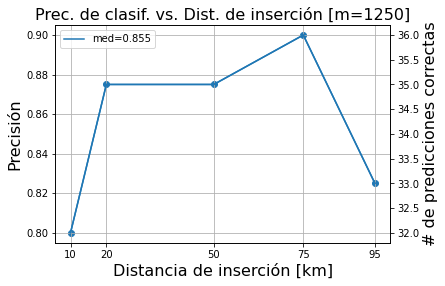

<Figure size 432x288 with 0 Axes>

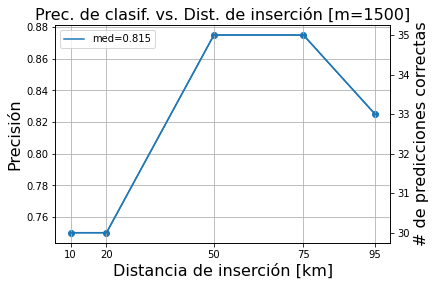

<Figure size 432x288 with 0 Axes>

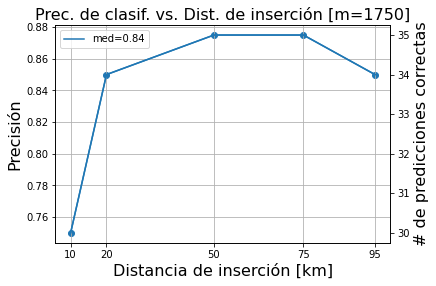

<Figure size 432x288 with 0 Axes>

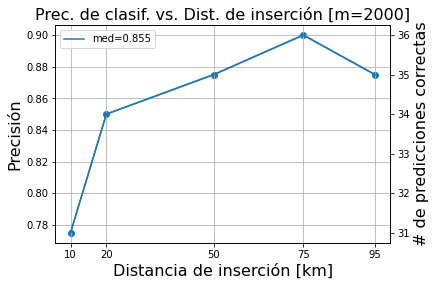

In [10]:
accuracies_faults = []
cants_faults = []
avg_accs = []

for m in emes:

    for dist in distancias:
        accs = pd.read_excel(f'matrices_conf_fallas/m{m}/accuracy_{dist}km_m{m}.xlsx')
        acc = accs['Accuracy'][0]
        cant = accs['Accuracy'][1]
        accuracies_faults.append(acc)
        cants_faults.append(cant)

    plt.figure()
    fig, ax1 = plt.subplots()   
    ax1.plot(distancias, accuracies_faults)
    ax1.scatter(distancias, accuracies_faults)
    ax1.grid()
    plt.title(f'Prec. de clasif. vs. Dist. de inserción [m={m}]', fontsize=16)
    plt.xlabel('Distancia de inserción [km]', fontsize=16)
    plt.ylabel('Precisión', fontsize=16)
    plt.xticks(distancias)
    plt.legend([f'med={np.round(np.average(accuracies_faults), 3)}'])
    ax2 = plt.twinx()
    ax2.plot(distancias, cants_faults)
    plt.ylabel('# de predicciones correctas', fontsize=16)
    avg_accs.append(np.round(np.average(accuracies_faults), 3))

    accuracies_faults = []
    cants_faults = []

    plt.savefig(f'grafs_y_cms/espa/orig_facc_vs_distance_m{m}.eps', format='eps')

[0.845, 0.8, 0.905, 0.88, 0.825, 0.855, 0.815, 0.84, 0.855]


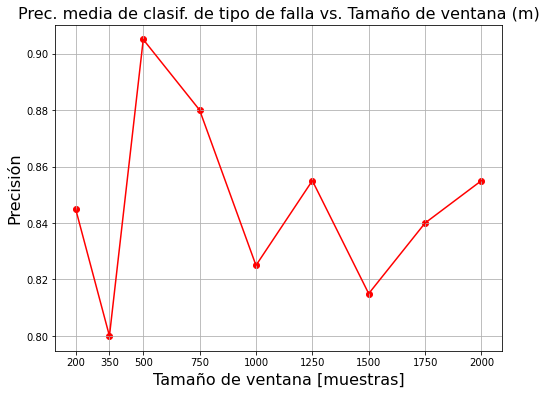

In [11]:
plt.figure(figsize=(8,6))
plt.plot(emes, avg_accs, color='r')
plt.scatter(emes, avg_accs, color='r')
plt.grid()
plt.title('Prec. media de clasif. de tipo de falla vs. Tamaño de ventana (m)', fontsize=16)
plt.xlabel('Tamaño de ventana [muestras]', fontsize=16)
plt.xticks(emes)
plt.ylabel('Precisión', fontsize=16)

plt.savefig(f'grafs_y_cms/espa/avg_facc_vs_m_original.eps', format='eps')
print(avg_accs)

C:\Users\Juan Pablo Naranjo\AppData\Local\Temp\ipykernel_20044\644121792.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


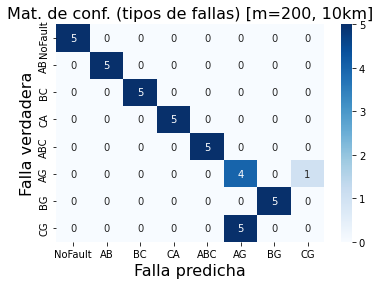

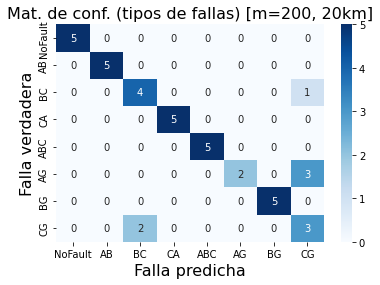

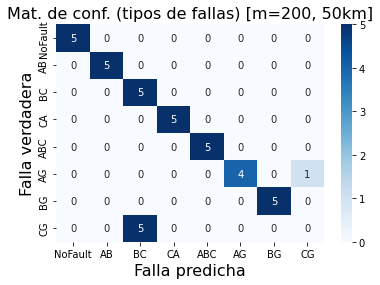

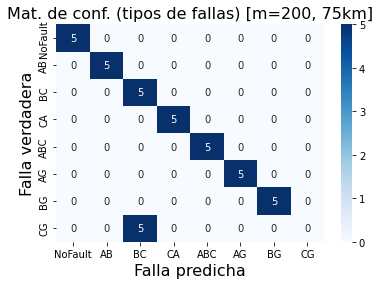

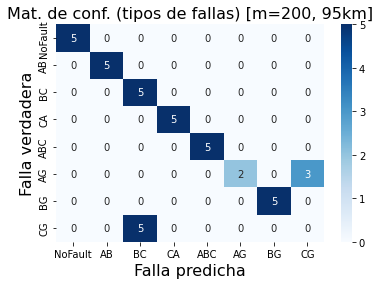

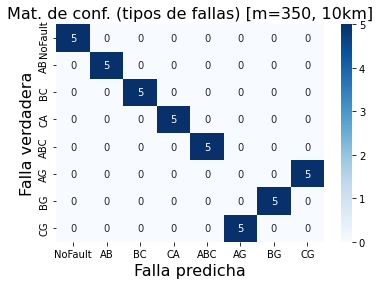

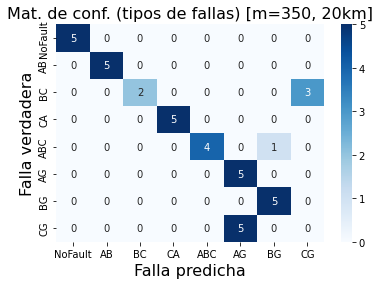

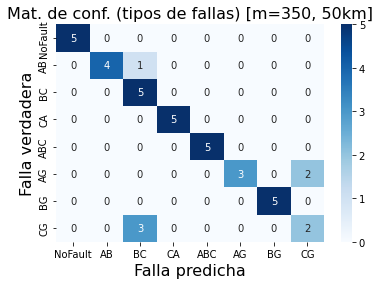

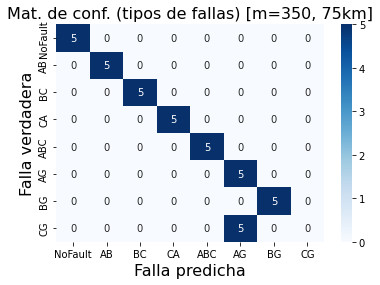

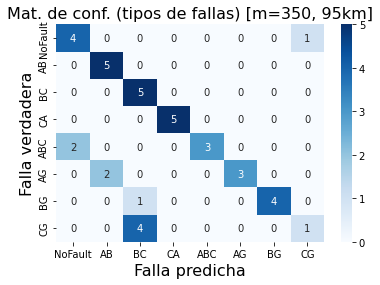

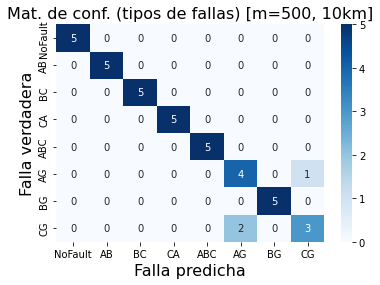

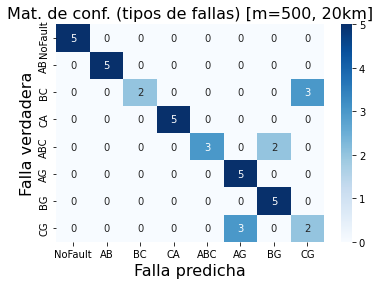

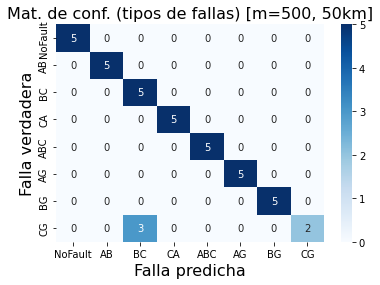

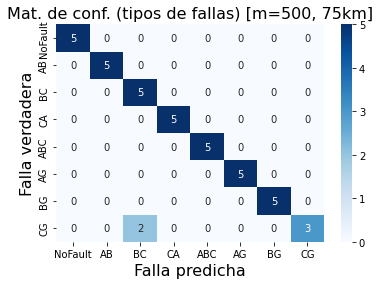

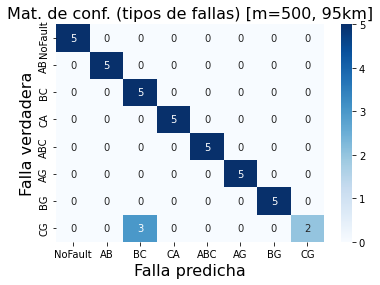

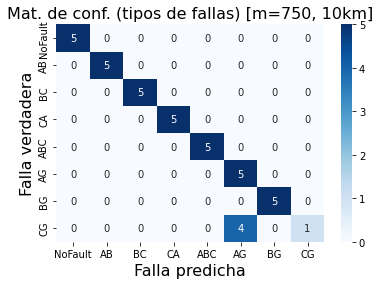

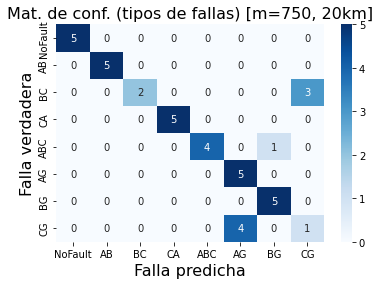

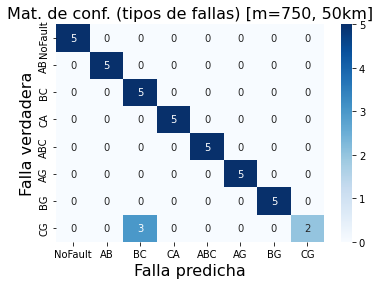

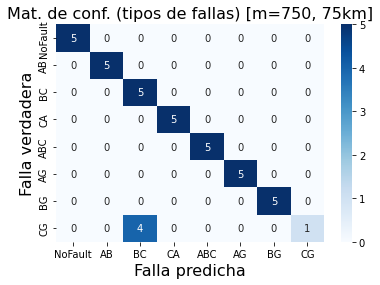

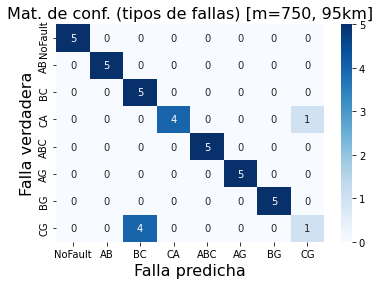

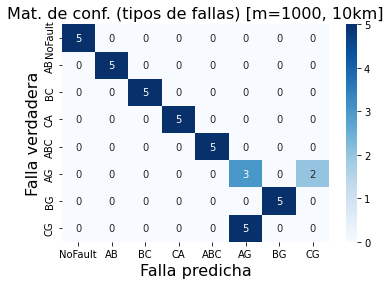

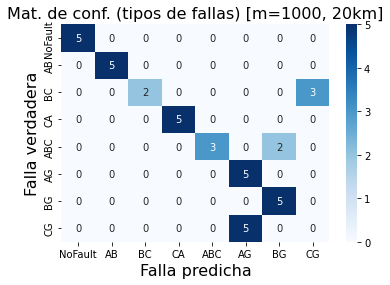

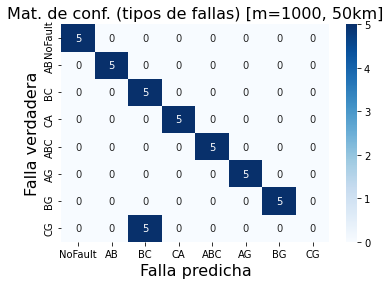

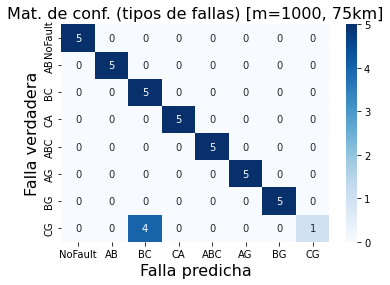

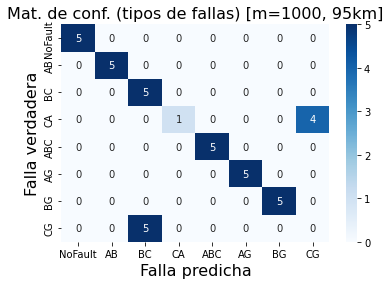

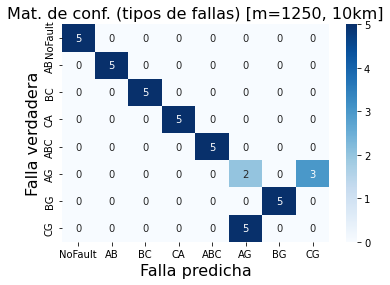

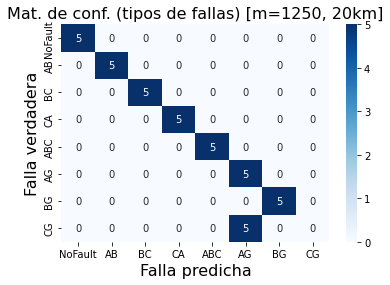

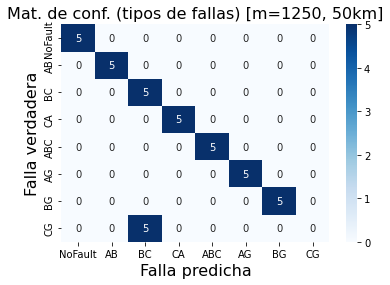

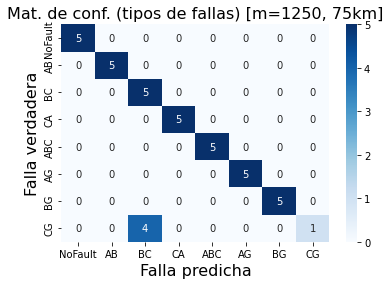

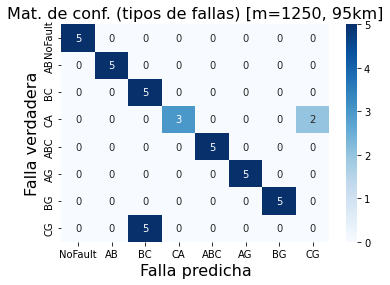

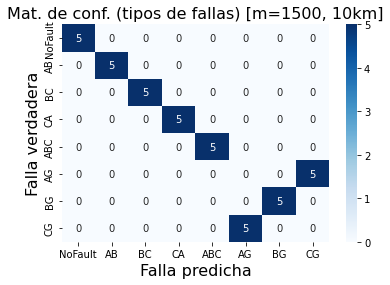

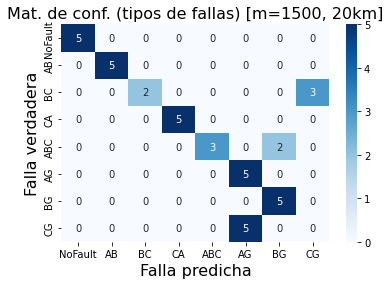

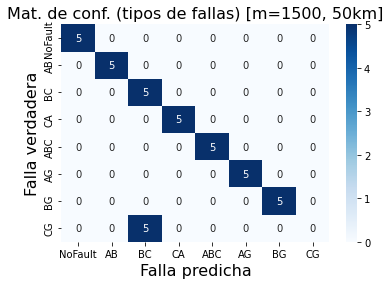

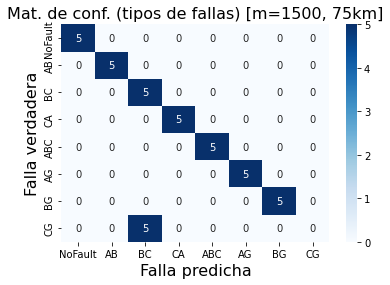

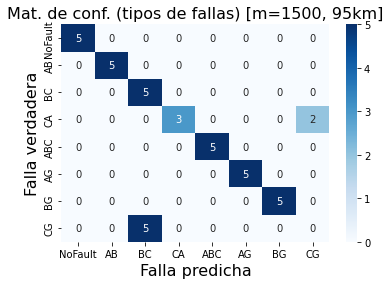

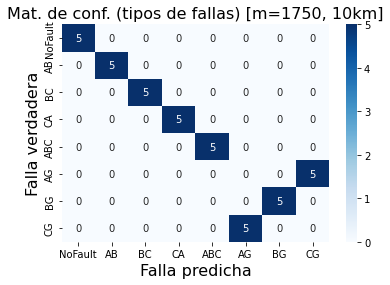

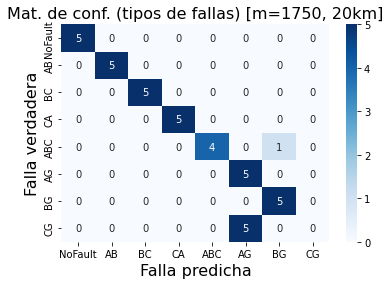

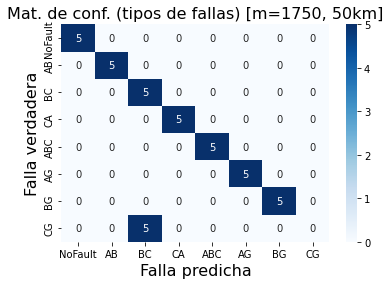

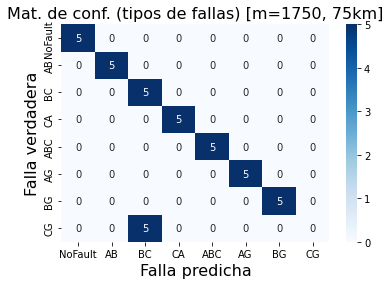

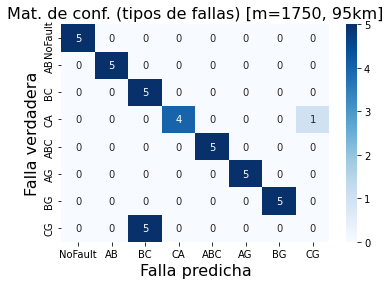

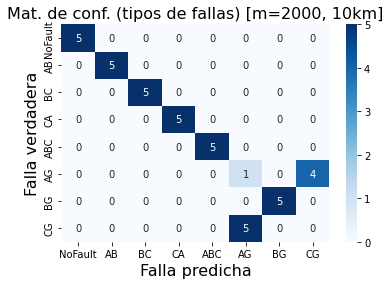

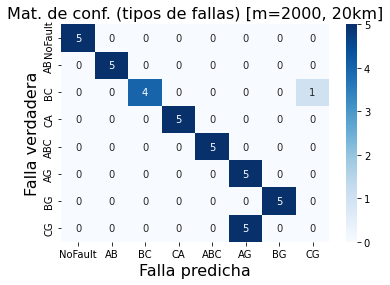

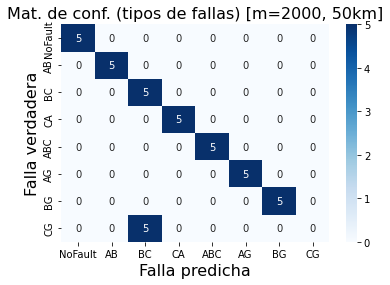

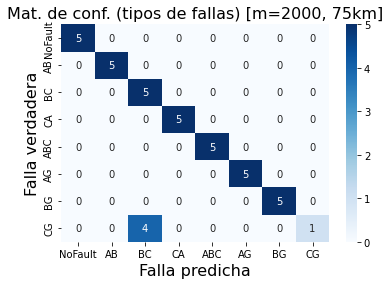

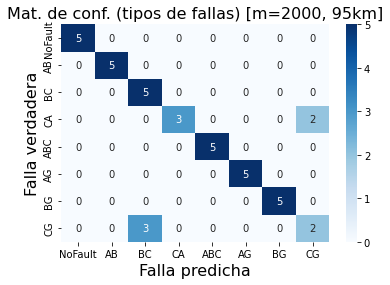

In [12]:
def get_cm_from_excel_faults(path):
    df1 = pd.read_excel(path)
    df2 = df1.drop(['Unnamed: 0'], axis=1)
    cm = np.array([df2.iloc[0].values, df2.iloc[1].values, df2.iloc[2].values, df2.iloc[3].values, df2.iloc[4].values, df2.iloc[5].values, df2.iloc[6].values, df2.iloc[7].values])
    return cm

for m in emes:
    for dist in distancias:
        path = f'matrices_conf_fallas/m{m}/mat_conf_fallas_{dist}km.xlsx'
        cm = get_cm_from_excel_faults(path)

        plt.figure()
        ax = plt.subplot()
        sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap="Blues")
        # labels, title and ticks
        ax.set_xlabel('Falla predicha', fontsize=16)
        ax.set_ylabel('Falla verdadera', fontsize=16)
        ax.set_title(f'Mat. de conf. (tipos de fallas) [m={m}, {dist}km]', fontsize=16)
        ax.xaxis.set_ticklabels(fallas)
        ax.yaxis.set_ticklabels(fallas)

        if m==500:
            plt.savefig(f'grafs_y_cms/espa/orig_cm_faults_{m}_{dist}km.eps', format='eps')
        elif m==1000 and dist==50:
            plt.savefig(f'grafs_y_cms/espa/orig_cm_faults_{m}_{dist}km.eps', format='eps')
        elif m==2000 and dist==75:
            plt.savefig(f'grafs_y_cms/espa/orig_cm_faults_{m}_{dist}km.eps', format='eps')